In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression

In [112]:
data = pd.read_csv('./CHD_preprocessed.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [113]:
# Renaming the column names
cols = ['male', 'age', 'education', 'smoker', 'cigs', 
        'bpmeds', 'stroke', 'hypertension', 'diabetes',
        'cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate',
        'glucose', 'chd']

data.columns = cols
data

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


Since the dataset is already cleaned and properly coded, we will not perform any further cleaning.

Below is the general statistics of this dataset.

In [127]:
data.describe()

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.280668,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.449380,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Let's look at the statistics of individual classes:

In [134]:
positive = data[data['chd'] == 1]
negative = data[data['chd'] == 0]

In [135]:
positive.describe()

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.0
mean,0.525478,54.173567,0.251592,0.514331,10.581210,0.074841,0.017516,0.507962,0.062102,245.307325,143.774682,86.995223,26.472812,76.507962,88.345541,1.0
std,0.499749,8.008178,0.434274,0.500193,12.961165,0.263344,0.131288,0.500335,0.241533,47.873133,26.851766,14.137369,4.454779,12.231614,39.501560,0.0
min,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,50.000000,40.000000,1.0
25%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214.000000,125.000000,78.000000,23.580000,68.000000,73.000000,1.0
50%,1.000000,55.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,241.000000,139.000000,85.000000,26.050000,75.000000,80.000000,1.0
75%,1.000000,61.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,271.000000,158.000000,95.000000,28.852500,84.250000,88.250000,1.0
max,1.000000,70.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,140.000000,56.800000,120.000000,394.000000,1.0


In [136]:
negative.describe()

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
count,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.0
mean,0.409700,48.730100,0.285877,0.491298,8.836519,0.027104,0.003994,0.275892,0.019116,235.115835,130.323110,82.133524,25.654182,75.820827,80.800000,0.0
std,0.491849,8.394026,0.451896,0.499996,11.704058,0.162410,0.063083,0.447026,0.136951,42.984636,20.454837,11.362873,3.990325,12.014991,18.122512,0.0
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.0
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.980000,68.000000,72.000000,0.0
50%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,127.000000,81.000000,25.230000,75.000000,79.000000,0.0
75%,1.000000,55.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,141.000000,88.000000,27.830000,83.000000,85.000000,0.0
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,453.000000,243.000000,142.500000,51.280000,143.000000,386.000000,0.0


This provides us a general feel of the relationship between the classes. From the above statistics, we can see that the positive class on average has a higher heart rate, cigaretts smoke, glucose, and cholesterol level. However, we need to also keep in mind the count of each class (this dataset is not balanced), which will be discussed later.

Let's make some quick visualizations of a few variables:

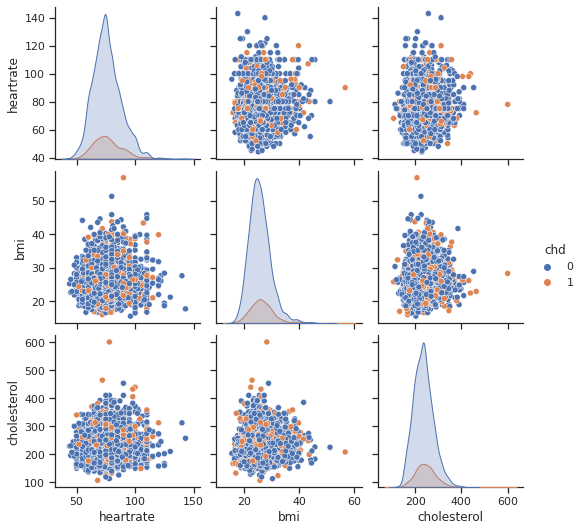

In [114]:
d1 = data[['heartrate', 'bmi', 'cholesterol', 'chd']]

sns.pairplot(d1, hue='chd')

From the above pairplot, we can see how the height of the distributions of heart rate, BMI, and cholesterol level is generally shorter for people with 10-year risk of corollary heart disease. However, there might be some external factors that contributed to the difference in those distributions. Let's first look at the mean from each class:

In [115]:
print("Mean heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].mean())
print("Mean heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].mean())

print("Max heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].max())
print("Max heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].max())

print("Median heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].median())
print("Median heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].median())

Mean heart rate for negative class:  75.82082738944365
Mean heart rate for positive class:  76.50796178343948
Max heart rate for negative class:  143.0
Max heart rate for positive class:  120.0
Median heart rate for negative class:  75.0
Median heart rate for positive class:  75.0


We can see that the statistics of both classes are very similar. Thus, the difference in distributions can be explained by the density of each class given that we saw how there are way more people in the negative class. In other words, the taller density distribution of the negative class around the mean simply means that there are more data points of that class.

Let's quickly look at the distribution of the classes:

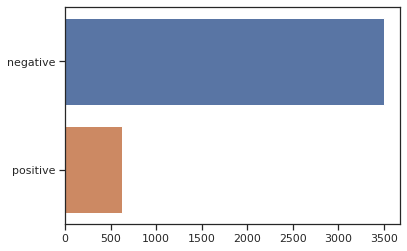

In [116]:
sns.barplot(x=data['chd'].value_counts().values, y=['negative', 'positive'], orient='h')

We can see that the distribution pof classes is heavily uneven and there are way more negative than positive classes.

Now, let us sample 500 data points from each class and re-plot the pairplot:

In [117]:
negative_indices = np.array(d1['chd'][d1['chd'] == 0].sample(n=500).index)
positive_indices = np.array(d1['chd'][d1['chd'] == 1].sample(n=500).index)
indices = np.append(negative_indices, positive_indices)
d2 = data[['heartrate', 'bmi', 'cholesterol', 'chd']].to_numpy()[indices]

In [118]:
d2.shape

(1000, 4)

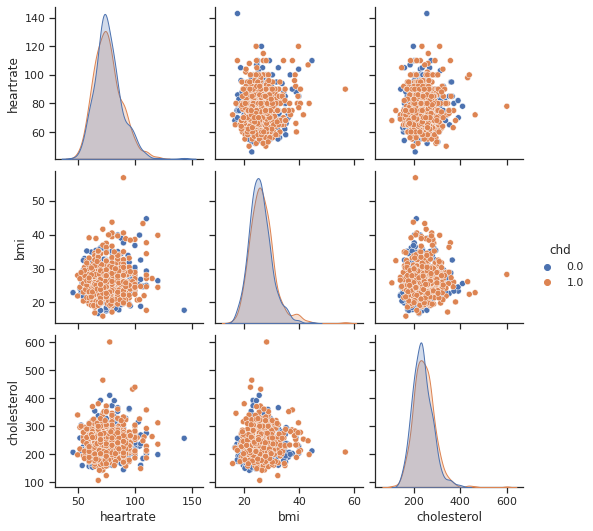

In [119]:
d2 = pd.DataFrame(d2, columns=['heartrate', 'bmi', 'cholesterol', 'chd'])

sns.pairplot(d2, hue='chd')

Here, we can see that the density distributions both classes are very similar which matches our expectation using the statistics earlier. However, this doesn't tell us anything useful since the distributions are similar and there is little to no correlation between the variables. Let's add a few more variables.

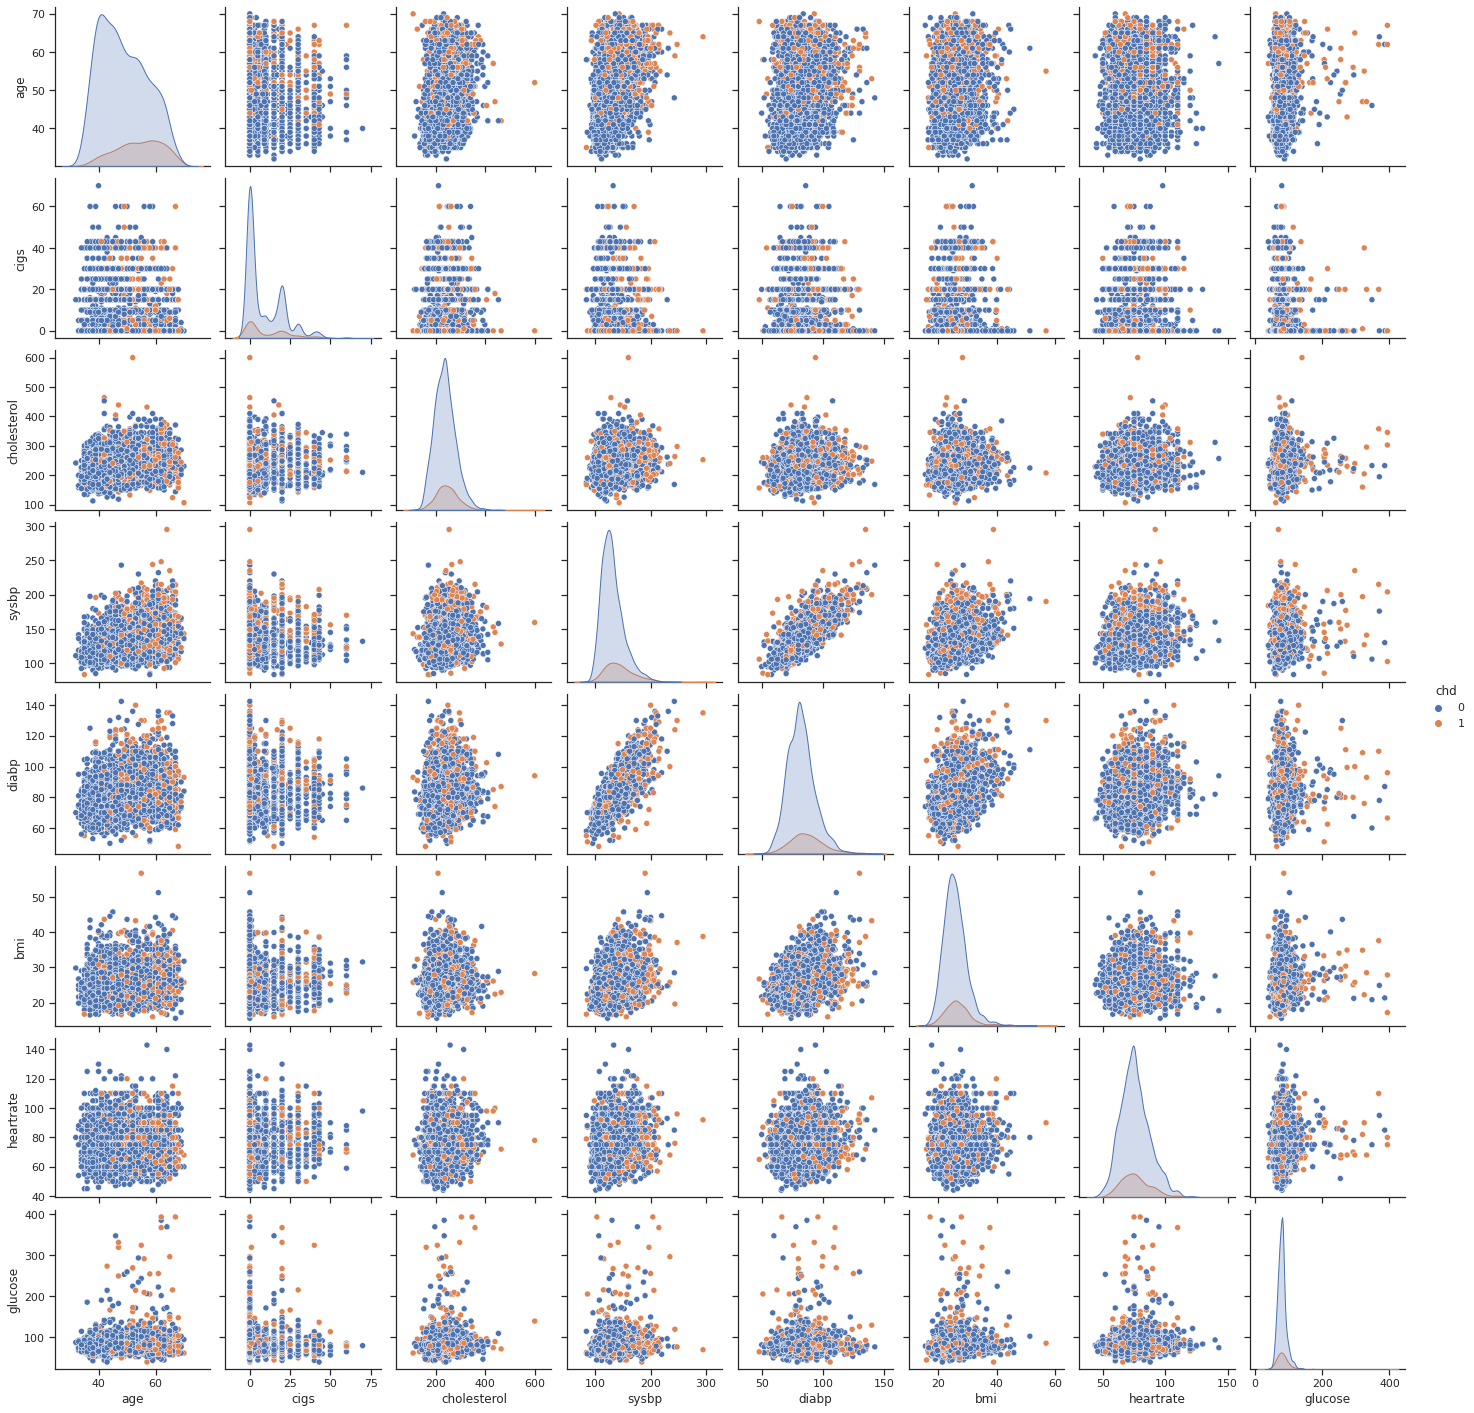

In [125]:
d3 = data[['age', 'cigs','cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose', 'chd']]

sns.pairplot(d3, hue='chd')

By just eyeballing the plots, we can see that there might be some positive correlation between systolic blood pressure (sysbp) and diastolic blood pressure (diabp). Let's get the correlation coefficient for each variable:

In [126]:
d3.corr()

,age,cigs,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
age,1.000000,-0.192079,0.266915,0.394675,0.209126,0.135138,-0.008788,0.116543,0.228260
cigs,-0.192079,1.000000,-0.024522,-0.089390,-0.055252,-0.088904,0.072660,-0.054101,0.052555
cholesterol,0.266915,-0.024522,1.000000,0.210655,0.168231,0.115800,0.089570,0.047502,0.083328
sysbp,0.394675,-0.089390,0.210655,1.000000,0.784691,0.324970,0.186476,0.136629,0.218715
diabp,0.209126,-0.055252,0.168231,0.784691,1.000000,0.377639,0.185271,0.060629,0.146028
bmi,0.135138,-0.088904,0.115800,0.324970,0.377639,1.000000,0.070467,0.078100,0.072134
heartrate,-0.008788,0.072660,0.089570,0.186476,0.185271,0.070467,1.000000,0.087127,0.020474
glucose,0.116543,-0.054101,0.047502,0.136629,0.060629,0.078100,0.087127,1.000000,0.118497
chd,0.228260,0.052555,0.083328,0.218715,0.146028,0.072134,0.020474,0.118497,1.000000


There is indeed a positive correlation between sysbp and diabp. However, upon looking at their definitions, they seem to be measuring blood presure at different states of the heart (beating and resting). Thus, further research is necessary to determine the significance of this correlation.